In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
boston = pd.read_csv('housing.csv', delim_whitespace=True, header=None)
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

boston.columns = column_names
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


##### Make a boxplot for the RM variable

Text(0.5, 1.0, 'Boxplot')

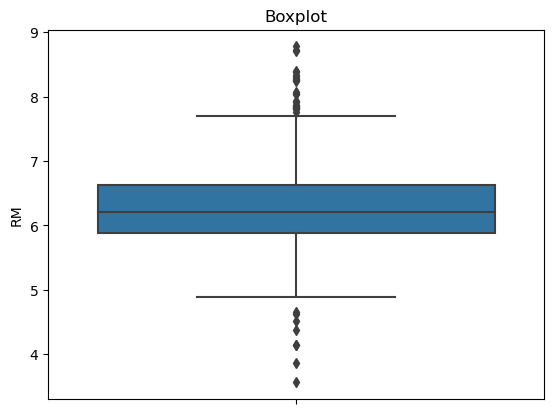

In [3]:
sns.boxplot(y=boston['RM'])
plt.title('Boxplot')

Text(0.5, 1.0, 'Boxplot')

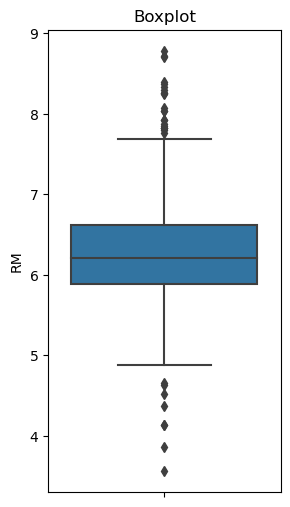

In [4]:
plt.figure(figsize=(3,6))
sns.boxplot(y=boston['RM'])
plt.title('Boxplot')

##### Create a function that takes a dataframe, a variable name, and the factor to use in the IQR calculation and returns the IQR proximity rule boundaries:

In [5]:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    
    return upper_boundary, lower_boundary

In [6]:
upper_boundary, lower_boundary = find_boundaries(boston, 'RM', 1.5)
upper_boundary, lower_boundary

(7.730500000000001, 4.778499999999999)

**Now, we need to find the outliers in the dataframe.**

###### Create a boolean vector to flag observations outside the boundaries we determined

In [7]:
outliers = np.where(boston['RM'] > upper_boundary, True,
            np.where(boston['RM'] < lower_boundary, True, False))

###### Create a new dataframe with the outlier values and then display the top five rows:

In [8]:
outliers_df = boston.loc[outliers, 'RM']
outliers_df.head()

97     8.069
98     7.820
162    7.802
163    8.375
166    7.929
Name: RM, dtype: float64

In [9]:
len(outliers_df)

30

- To find the outliers of RM, we used NumPy's where() method, which produced a boolean vector with True if the value was an outlier.
- where() scanned the rows of the RM variable, and if the value was bigger than the upper boundary, it assigned True, whereas if the value was smaller, the second where() nested inside the first one and checked whether the value was smaller than the lower boundary, in which case it also assigned True, otherwise False.
- Finally, we used the loc[] method from pandas to capture only those values in the RM variable that were outliers in a new dataframe.